In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as linear_model
import seaborn as sns
#import xgboost as xgb
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import HTML,display

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv('D:\\data\\boston\\train.csv')
test=pd.read_csv('D:\\data\\boston\\test.csv')

In [3]:
nullValues=pd.DataFrame()
nullValues['nullValues']=train.isnull().sum()
nullValues['percentage']=0
nullValues['percentage']=nullValues.nullValues/nullValues.nullValues\
    .count()
nullValues[(nullValues.nullValues>0) & (nullValues.percentage>0.15)]\
    .sort_values(by='percentage',ascending=False).index.tolist()

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1']

In [4]:
combain=[train,test]
for dataset in combain:
    dataset=dataset.drop(['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1','Id'], axis=1, inplace=True)

In [5]:
train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
nullValues[(nullValues.nullValues>0) & (nullValues.percentage<0.15)]\
    .sort_values(by='percentage',ascending=False)

,nullValues,percentage
MasVnrType,8,0.098765
MasVnrArea,8,0.098765
Electrical,1,0.012346


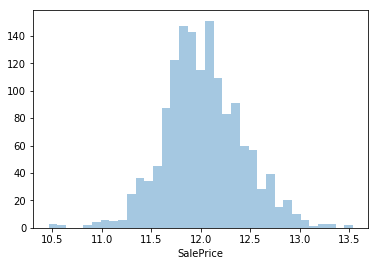

In [7]:
#sns.distplot(train['SalePrice'],kde=False,fit=stats.lognorm)
data=np.log1p(train['SalePrice'])
sns.distplot(data,kde=False)

In [8]:
print stats.skew(data)
print stats.kurtosis(data)

print stats.skew(train['SalePrice'])
print stats.kurtosis(train['SalePrice'])

0.121221913115
0.802642710747
1.88094074603
6.50981201109


In [10]:
print train.shape
print test.shape
y_train=np.log1p(train['SalePrice'])
train=train.drop('SalePrice',axis=1)
print '---------------------------'
print train.shape
print test.shape

(1460, 64)
(1459, 63)
---------------------------
(1460, 63)
(1459, 63)


In [11]:
numerical_var=[f for f in train.columns if train.dtypes[f] 
        != 'object']
catagorical_var=[f for f in train.columns if train.dtypes[f] == 'object']

In [ ]:
train=train.dropna()
test=test.dropna()

In [12]:
combain=pd.concat([train,test],axis=0)
dummified_data=pd.get_dummies(combain[catagorical_var])
combain=combain.drop(catagorical_var,axis=1)
combain=pd.concat([combain,dummified_data],axis=1)
print combain.shape
print combain.shape

(2919, 225)
(2919, 225)


In [18]:
skewed=train[numerical_var].apply(lambda x:stats.skew(x.dropna()))
skewed=skewed[skewed>0.75]
skewed=skewed.index
print np.size(list(skewed))
combain[skewed]=np.log1p(combain[skewed])

20
